In [1]:
#Setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

covid_19_india_url="covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, index_col="Date", dayfirst=True, parse_dates=True)

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
  0% 0.00/188k [00:00<?, ?B/s]
100% 188k/188k [00:00<00:00, 69.4MB/s]
Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [6]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
covid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, index_col="Date", dayfirst=True, parse_dates=True)
"""

'\ncovid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"\ncovid_19_india=pd.read_csv(covid_19_india_url, index_col="Date", dayfirst=True, parse_dates=True)\n'

In [7]:
covid_19_india.tail()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-05-06,1667,8:00 AM,Telengana,-,-,585,29,1096
2020-05-06,1668,8:00 AM,Tripura,-,-,2,0,43
2020-05-06,1669,8:00 AM,Uttarakhand,-,-,39,1,61
2020-05-06,1670,8:00 AM,Uttar Pradesh,-,-,987,56,2880
2020-05-06,1671,8:00 AM,West Bengal,-,-,364,140,1344


Plot graphs of the cases observed, recovered, deaths per day country-wise and state-wise.

37


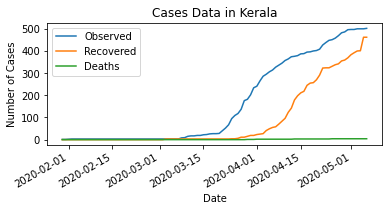

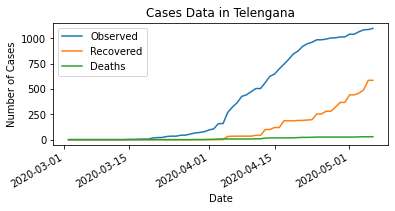

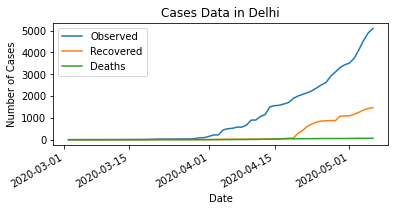

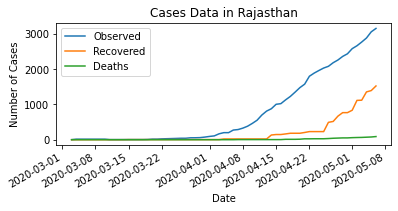

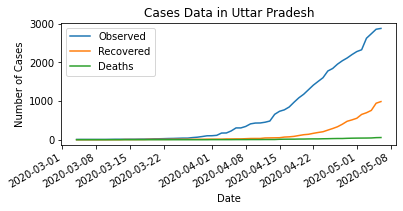

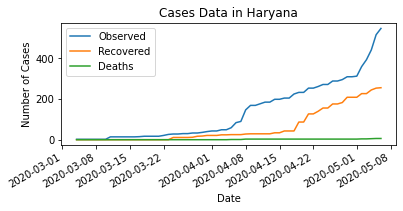

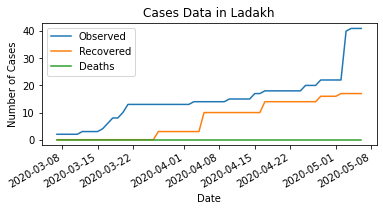

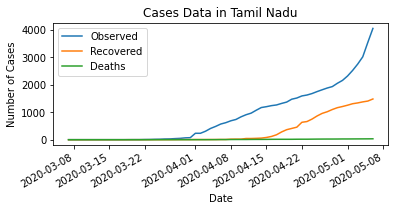

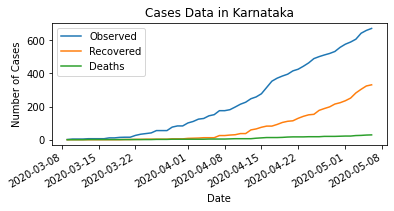

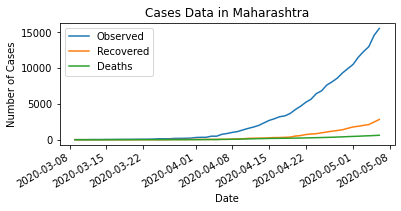

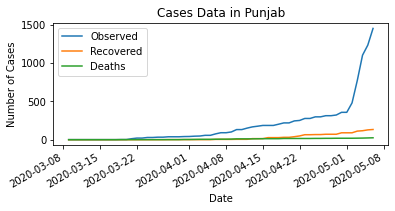

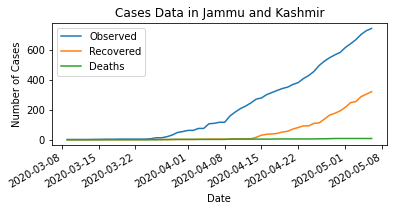

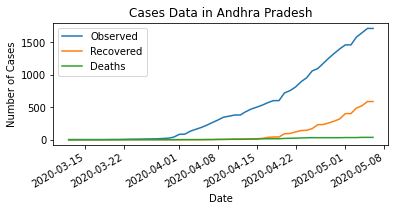

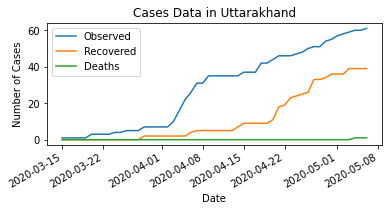

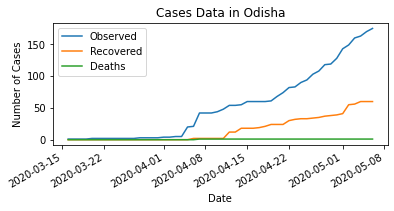

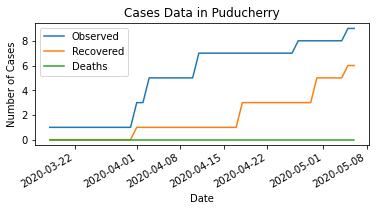

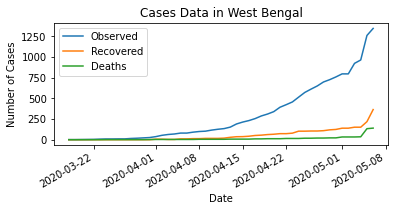

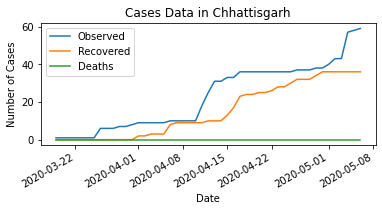

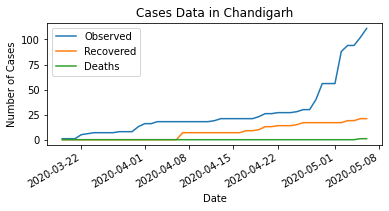

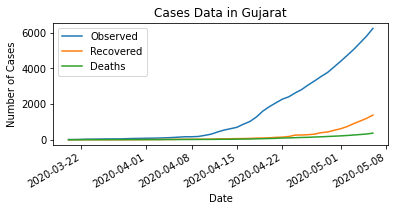

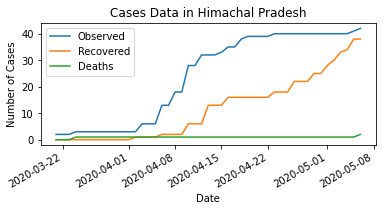

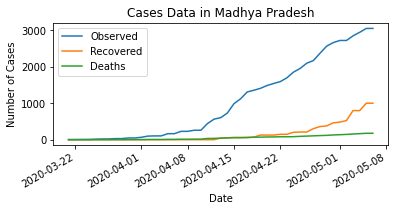

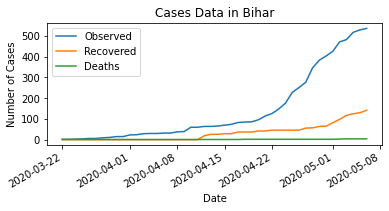

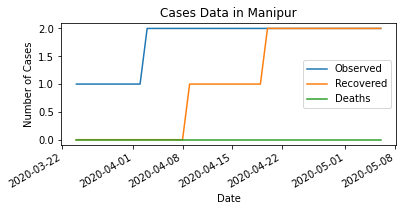

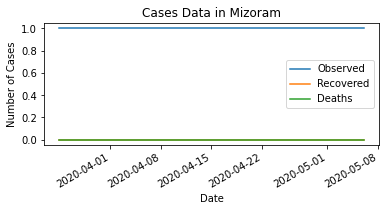

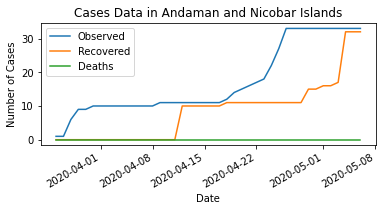

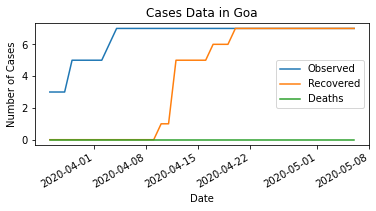

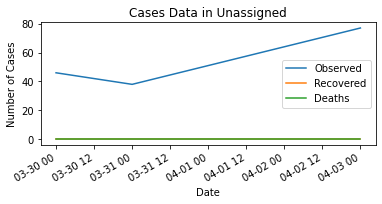

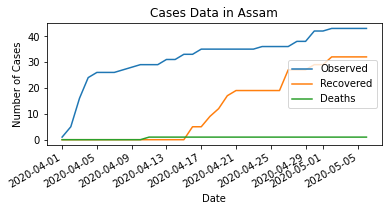

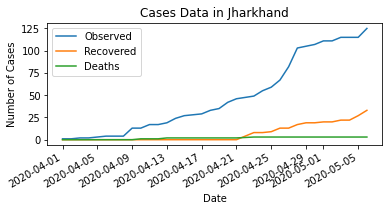

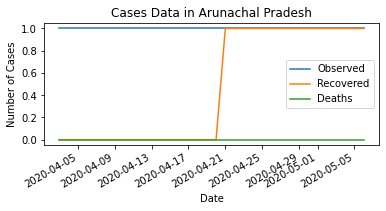

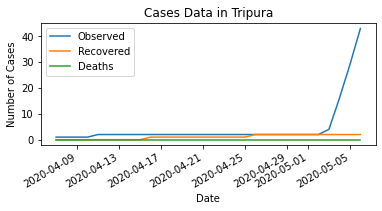

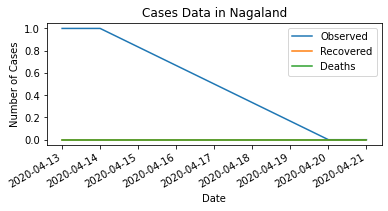

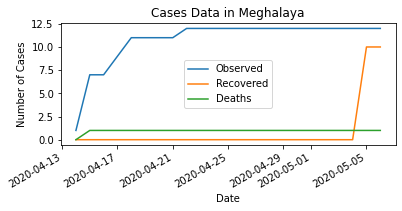

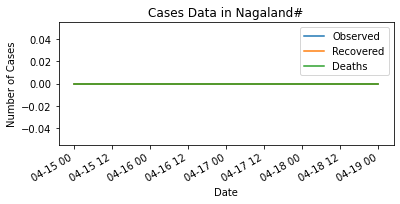

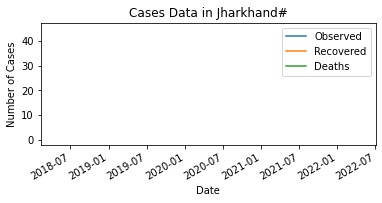

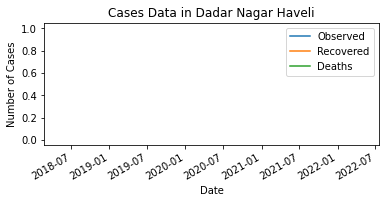

In [8]:
#Displaying States Data
unique_state=covid_19_india['State/UnionTerritory'].unique()
print (len(unique_state))
for i in unique_state:
  temp=covid_19_india.loc[covid_19_india['State/UnionTerritory']==i]
  fig = plt.figure(figsize=(6,2.5))
  sns.lineplot(data=temp.Confirmed, label="Observed")
  sns.lineplot(data=temp.Cured, label="Recovered")
  sns.lineplot(data=temp.Deaths, label="Deaths")
  fig.align_xlabels()
  fig.autofmt_xdate()
  plt.title("Cases Data in "+i)
  plt.xlabel("Date")
  plt.ylabel("Number of Cases")
  plt.show()

In [9]:
#Computing cumulative data
india_data=covid_19_india.groupby("Date").agg({'Confirmed':'sum', 'Cured':'sum', 'Deaths':'sum'})
india_data

,Confirmed,Cured,Deaths
Date,,,
2020-01-30,1,0,0
2020-01-31,1,0,0
2020-02-01,2,0,0
2020-02-02,3,0,0
2020-02-03,3,0,0
...,...,...,...
2020-05-02,37157,9951,1218
2020-05-03,40124,10887,1306
2020-05-04,42836,11762,1389


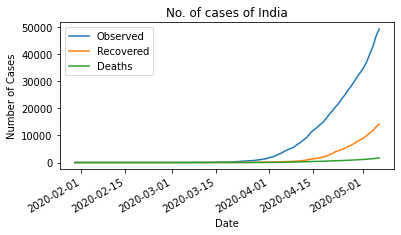

In [14]:
#Displaying plots for India
fig = plt.figure(figsize=(6,3))
sns.lineplot(data=india_data.Confirmed, label="Observed")
sns.lineplot(data=india_data.Cured, label="Recovered")
sns.lineplot(data=india_data.Deaths, label="Deaths")
fig.align_xlabels()
fig.autofmt_xdate()
plt.title("No. of cases of India")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()